<a href="https://colab.research.google.com/github/sindhujajakkula/Fabric-plot/blob/main/Fabric_plot_random_62_biaxial_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
#importing libraries

particle_filename='b62S100P'
force_filename='b62S100C'

In [2]:
pd.set_option('display.precision', 11)
df = pd.read_table(f"{particle_filename}.txt", delimiter=' ', names=['x_coord','y_coord','z_coord', 'a', 'b', 'c', 'radius', 'no'])
df
#converting data file into pandas dataframe

,x_coord,y_coord,z_coord,a,b,c,radius,no
0,Time,Fragment:100;,LENGTH_SCALE:,0.016156;,Potential:,0.35960000,NaN,NaN
1,0.82359685,0.25652673,0.01483936,0.03094751,0.00000000,0.00000310,0.00000000,0.0
2,0.83656745,0.70680378,0.75884780,0.03094751,0.00008247,0.00000356,1.00000000,1.0
3,0.99193586,0.96448765,0.49153215,0.03094751,0.00007834,0.00000110,1.00000000,2.0
4,0.36614314,0.73386759,0.66290895,0.03094751,0.00007929,0.00000361,1.00000000,3.0
...,...,...,...,...,...,...,...,...
4996,0.96419033,0.72782542,0.71426358,0.03094751,0.00011200,0.00002308,1.00000000,4995.0
4997,0.17787042,0.49769245,0.11045515,0.03094751,0.00000610,0.00003088,0.00000000,4996.0
4998,0.27483473,0.12595582,0.68778576,0.03094751,0.00000726,0.00002239,0.00000000,4997.0
4999,0.49722336,0.57086175,0.65223395,0.03094751,0.00007326,0.00003949,0.98609616,4998.0


In [3]:
df = df.drop(index=0)
#dropping frist row

In [4]:
df = df.reset_index(drop=True)
#resetting index to start from 0

In [5]:
df

,x_coord,y_coord,z_coord,a,b,c,radius,no
0,0.82359685,0.25652673,0.01483936,0.03094751,0.00000000,0.00000310,0.00000000,0.0
1,0.83656745,0.70680378,0.75884780,0.03094751,0.00008247,0.00000356,1.00000000,1.0
2,0.99193586,0.96448765,0.49153215,0.03094751,0.00007834,0.00000110,1.00000000,2.0
3,0.36614314,0.73386759,0.66290895,0.03094751,0.00007929,0.00000361,1.00000000,3.0
4,0.98934432,0.73217856,0.61422392,0.03094751,0.00009889,0.00000250,1.00000000,4.0
...,...,...,...,...,...,...,...,...
4995,0.96419033,0.72782542,0.71426358,0.03094751,0.00011200,0.00002308,1.00000000,4995.0
4996,0.17787042,0.49769245,0.11045515,0.03094751,0.00000610,0.00003088,0.00000000,4996.0
4997,0.27483473,0.12595582,0.68778576,0.03094751,0.00000726,0.00002239,0.00000000,4997.0
4998,0.49722336,0.57086175,0.65223395,0.03094751,0.00007326,0.00003949,0.98609616,4998.0


In [6]:
df.info()
#finding datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_coord  5000 non-null   object 
 1   y_coord  5000 non-null   object 
 2   z_coord  5000 non-null   object 
 3   a        5000 non-null   object 
 4   b        5000 non-null   object 
 5   c        5000 non-null   float64
 6   radius   5000 non-null   float64
 7   no       5000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 312.6+ KB


In [7]:
df[['x_coord', 'y_coord', 'z_coord']] = df[['x_coord', 'y_coord', 'z_coord']].apply(pd.to_numeric)
#converting object datatype to float datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_coord  5000 non-null   float64
 1   y_coord  5000 non-null   float64
 2   z_coord  5000 non-null   float64
 3   a        5000 non-null   object 
 4   b        5000 non-null   object 
 5   c        5000 non-null   float64
 6   radius   5000 non-null   float64
 7   no       5000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [9]:
# Create a Plotly figure, particle position plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df.x_coord, y=df.y_coord, z=df.z_coord, mode='markers', marker=dict(size=4, opacity=0.5, line=dict(width=2, color='black'))))
fig.show()
fig.write_html(f"scatter_plot_random_{particle_filename}.html")

In [10]:
df['x_coord'].describe()
#finding the statistics of the x_coord column

count    5000.00000000000
mean        0.49797214238
std         0.28837706021
min         0.00020892000
25%         0.24915955500
50%         0.49766430000
75%         0.74714917250
max         1.00044150000
Name: x_coord, dtype: float64

<Axes: >

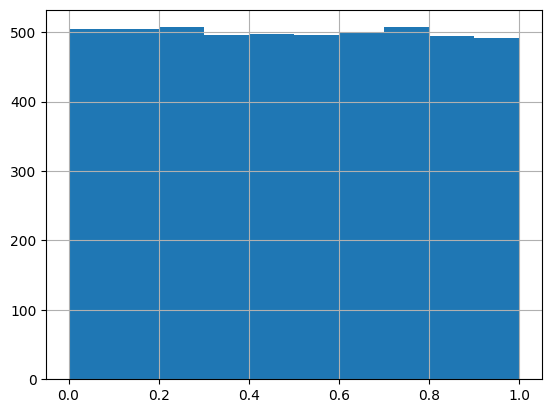

In [11]:
df['x_coord'].hist()
#plotting histogram of x_coord column

In [12]:
force = pd.read_csv(f"{force_filename}.txt", sep=" ", header=None)
force.columns = ["p1", "p2", "f", "f1"]
#reading force data file into pandas dataframe
#p1 - particle 1
#p2 - particle 2
#f - force acting between the pair
#f1 - value to be ignored

In [13]:
force

,p1,p2,f,f1
0,0,4765,0.00000180,0.00000018
1,1,467,14.42192192,1.25834803
2,1,4621,16.55926426,1.64781161
3,1,4917,6.47388903,0.10983853
4,1,2356,14.06354602,0.52982927
...,...,...,...,...
13518,4922,4947,12.68994070,0.28004940
13519,4939,4982,5.54118867,0.29963447
13520,4945,4962,16.21866602,0.84625317
13521,4960,4996,5.27966691,0.45977100


In [14]:
force['p2'].max()
#max number in p2 column

4999

In [15]:
df

,x_coord,y_coord,z_coord,a,b,c,radius,no
0,0.82359685,0.25652673,0.01483936,0.03094751,0.00000000,0.00000310,0.00000000,0.0
1,0.83656745,0.70680378,0.75884780,0.03094751,0.00008247,0.00000356,1.00000000,1.0
2,0.99193586,0.96448765,0.49153215,0.03094751,0.00007834,0.00000110,1.00000000,2.0
3,0.36614314,0.73386759,0.66290895,0.03094751,0.00007929,0.00000361,1.00000000,3.0
4,0.98934432,0.73217856,0.61422392,0.03094751,0.00009889,0.00000250,1.00000000,4.0
...,...,...,...,...,...,...,...,...
4995,0.96419033,0.72782542,0.71426358,0.03094751,0.00011200,0.00002308,1.00000000,4995.0
4996,0.17787042,0.49769245,0.11045515,0.03094751,0.00000610,0.00003088,0.00000000,4996.0
4997,0.27483473,0.12595582,0.68778576,0.03094751,0.00000726,0.00002239,0.00000000,4997.0
4998,0.49722336,0.57086175,0.65223395,0.03094751,0.00007326,0.00003949,0.98609616,4998.0


In [16]:
force['xp1']=np.array(df['x_coord'][force['p1']])
force['yp1']=np.array(df['y_coord'][force['p1']])
force['zp1']=np.array(df['z_coord'][force['p1']])
force['xp2']=np.array(df['x_coord'][force['p2']])
force['yp2']=np.array(df['y_coord'][force['p2']])
force['zp2']=np.array(df['z_coord'][force['p2']])
#adding new columns, coordinates of particles to force dataframe

In [17]:
force

,p1,p2,f,f1,xp1,yp1,zp1,xp2,yp2,zp2
0,0,4765,0.00000180,0.00000018,0.82359685,0.25652673,0.01483936,0.77814290,0.29215198,0.03710529
1,1,467,14.42192192,1.25834803,0.83656745,0.70680378,0.75884780,0.87348482,0.68780467,0.71343604
2,1,4621,16.55926426,1.64781161,0.83656745,0.70680378,0.75884780,0.77595948,0.70191924,0.74965094
3,1,4917,6.47388903,0.10983853,0.83656745,0.70680378,0.75884780,0.82293996,0.64670905,0.76159548
4,1,2356,14.06354602,0.52982927,0.83656745,0.70680378,0.75884780,0.80393322,0.75711932,0.77263854
...,...,...,...,...,...,...,...,...,...,...
13518,4922,4947,12.68994070,0.28004940,0.67098052,0.86141144,0.44621239,0.69305879,0.88374236,0.39326310
13519,4939,4982,5.54118867,0.29963447,0.55374125,0.17910113,0.65497913,0.61198795,0.18737422,0.63637523
13520,4945,4962,16.21866602,0.84625317,0.77634717,0.30446838,0.88408580,0.76697236,0.33728996,0.83292626
13521,4960,4996,5.27966691,0.45977100,0.19998289,0.45082154,0.07695685,0.17787042,0.49769245,0.11045515


In [18]:
force['vector_xcomp']=force['xp2']-force['xp1']
force['vector_ycomp']=force['yp2']-force['yp1']
force['vector_zcomp']=force['zp2']-force['zp1']
#finding x, y  and z components of vector

In [19]:
force

,p1,p2,f,f1,xp1,yp1,zp1,xp2,yp2,zp2,vector_xcomp,vector_ycomp,vector_zcomp
0,0,4765,0.00000180,0.00000018,0.82359685,0.25652673,0.01483936,0.77814290,0.29215198,0.03710529,-0.04545395,0.03562525,0.02226593
1,1,467,14.42192192,1.25834803,0.83656745,0.70680378,0.75884780,0.87348482,0.68780467,0.71343604,0.03691737,-0.01899911,-0.04541176
2,1,4621,16.55926426,1.64781161,0.83656745,0.70680378,0.75884780,0.77595948,0.70191924,0.74965094,-0.06060797,-0.00488454,-0.00919686
3,1,4917,6.47388903,0.10983853,0.83656745,0.70680378,0.75884780,0.82293996,0.64670905,0.76159548,-0.01362749,-0.06009473,0.00274768
4,1,2356,14.06354602,0.52982927,0.83656745,0.70680378,0.75884780,0.80393322,0.75711932,0.77263854,-0.03263423,0.05031554,0.01379074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,4922,4947,12.68994070,0.28004940,0.67098052,0.86141144,0.44621239,0.69305879,0.88374236,0.39326310,0.02207827,0.02233092,-0.05294929
13519,4939,4982,5.54118867,0.29963447,0.55374125,0.17910113,0.65497913,0.61198795,0.18737422,0.63637523,0.05824670,0.00827309,-0.01860390
13520,4945,4962,16.21866602,0.84625317,0.77634717,0.30446838,0.88408580,0.76697236,0.33728996,0.83292626,-0.00937481,0.03282158,-0.05115954
13521,4960,4996,5.27966691,0.45977100,0.19998289,0.45082154,0.07695685,0.17787042,0.49769245,0.11045515,-0.02211247,0.04687091,0.03349830


In [20]:
vector_array = force[['vector_xcomp', 'vector_ycomp', 'vector_zcomp']].to_numpy()
#converting columns to numpy array

In [21]:
vector_array

array([[-0.04545395,  0.03562525,  0.02226593],
       [ 0.03691737, -0.01899911, -0.04541176],
       [-0.06060797, -0.00488454, -0.00919686],
       ...,
       [-0.00937481,  0.03282158, -0.05115954],
       [-0.02211247,  0.04687091,  0.0334983 ],
       [ 0.03786716, -0.03884798,  0.0293342 ]])

In [22]:
import numpy as np
import math

def CartesianToSpherical(vector_array):
    '''
    func CartesianToSpherical - changes cartesian coordinates to spherical coordinates
    input - array, 3 columns - x, y, z components of vectors, rows - number of vectors
    output - array, 3 columns - r, phi, theta
    
    '''
    ptsnew = np.zeros(vector_array.shape)
    xy = vector_array[:,0]**2 + vector_array[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + vector_array[:,2]**2)
    ptsnew[:,1] = np.degrees(np.arctan2(np.sqrt(xy), vector_array[:,2])) # for elevation angle defined from Z-axis down
    #ptsnew[:,4] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,2] = np.degrees(np.arctan2(vector_array[:,1], vector_array[:,0]))
    return ptsnew

In [23]:
SphericalCoordArray_deg = CartesianToSpherical(vector_array)
#obtaining spherical coordinates from cartesian coordinates

In [24]:
SphericalCoordArray_deg

array([[ 6.18950050e-02,  6.89159483e+01,  1.41911867e+02],
       [ 6.15311818e-02,  1.37563736e+02, -2.72321068e+01],
       [ 6.14960730e-02,  9.86009645e+01, -1.75392356e+02],
       ...,
       [ 6.15015586e-02,  1.46288357e+02,  1.05940902e+02],
       [ 6.17088295e-02,  5.71225115e+01,  1.15256713e+02],
       [ 6.16731923e-02,  6.15990107e+01, -4.57324993e+01]])

In [25]:
spher_df = pd.DataFrame(SphericalCoordArray_deg, columns = ['r', 'phi', 'theta'])

#convert array containing spherical coordinates of vector into a dataframe

In [26]:
spher_df

,r,phi,theta
0,0.06189500502,68.91594829802,141.91186656945
1,0.06153118181,137.56373569608,-27.23210683915
2,0.06149607298,98.60096453794,-175.39235581425
3,0.06168172179,87.44685174553,-102.77669964885
4,0.06153723298,77.04980431281,122.96709790180
...,...,...,...
13518,0.06156092353,149.32916228823,45.32596006640
13519,0.06170273231,107.54823136726,8.08395309177
13520,0.06150155859,146.28835720184,105.94090217181
13521,0.06170882949,57.12251152084,115.25671323996


In [27]:
#spher_df.index += 1
#changing index to start from 1

In [28]:
force = pd.concat([force, spher_df], axis=1, join='inner')
#concatenating force and spherical coordinates df to force dataframe

In [29]:
force

,p1,p2,f,f1,xp1,yp1,zp1,xp2,yp2,zp2,vector_xcomp,vector_ycomp,vector_zcomp,r,phi,theta
0,0,4765,0.00000180,0.00000018,0.82359685,0.25652673,0.01483936,0.77814290,0.29215198,0.03710529,-0.04545395,0.03562525,0.02226593,0.06189500502,68.91594829802,141.91186656945
1,1,467,14.42192192,1.25834803,0.83656745,0.70680378,0.75884780,0.87348482,0.68780467,0.71343604,0.03691737,-0.01899911,-0.04541176,0.06153118181,137.56373569608,-27.23210683915
2,1,4621,16.55926426,1.64781161,0.83656745,0.70680378,0.75884780,0.77595948,0.70191924,0.74965094,-0.06060797,-0.00488454,-0.00919686,0.06149607298,98.60096453794,-175.39235581425
3,1,4917,6.47388903,0.10983853,0.83656745,0.70680378,0.75884780,0.82293996,0.64670905,0.76159548,-0.01362749,-0.06009473,0.00274768,0.06168172179,87.44685174553,-102.77669964885
4,1,2356,14.06354602,0.52982927,0.83656745,0.70680378,0.75884780,0.80393322,0.75711932,0.77263854,-0.03263423,0.05031554,0.01379074,0.06153723298,77.04980431281,122.96709790180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,4922,4947,12.68994070,0.28004940,0.67098052,0.86141144,0.44621239,0.69305879,0.88374236,0.39326310,0.02207827,0.02233092,-0.05294929,0.06156092353,149.32916228823,45.32596006640
13519,4939,4982,5.54118867,0.29963447,0.55374125,0.17910113,0.65497913,0.61198795,0.18737422,0.63637523,0.05824670,0.00827309,-0.01860390,0.06170273231,107.54823136726,8.08395309177
13520,4945,4962,16.21866602,0.84625317,0.77634717,0.30446838,0.88408580,0.76697236,0.33728996,0.83292626,-0.00937481,0.03282158,-0.05115954,0.06150155859,146.28835720184,105.94090217181
13521,4960,4996,5.27966691,0.45977100,0.19998289,0.45082154,0.07695685,0.17787042,0.49769245,0.11045515,-0.02211247,0.04687091,0.03349830,0.06170882949,57.12251152084,115.25671323996


In [30]:
force.columns
#displaying columns in force dataframe

Index(['p1', 'p2', 'f', 'f1', 'xp1', 'yp1', 'zp1', 'xp2', 'yp2', 'zp2',
       'vector_xcomp', 'vector_ycomp', 'vector_zcomp', 'r', 'phi', 'theta'],
      dtype='object')

In [31]:
force['theta'].describe()
#angle on the xy plane
#output shows that theta ranges from -179 to 180 degrees

count    13523.00000000000
mean        -0.61711015112
std        103.56255229448
min       -179.98494771377
25%        -90.89745955482
50%         -0.99308657598
75%         89.69926031530
max        179.99213376737
Name: theta, dtype: float64

In [32]:
force['phi'].describe()
#azimuthal angle, measured from positive z aixs
#output shows that phi ranges from 45 to 90

count    13523.00000000000
mean        90.47590538920
std         39.35663857778
min          0.75197725799
25%         60.00867212605
50%         90.83549193895
75%        120.94412800300
max        179.83209212897
Name: phi, dtype: float64

In the above code, we have considered force acting only one particle in contact. Since conntact force acts on both the particles. We will apply same amount of force on the other particle in contact. 


Following similar code again to generate another half of force vectors.
The dataframe is named as force2

In [33]:
force2 = pd.read_csv(f"{force_filename}.txt", sep=" ", header=None)
force2.columns = ["p2", "p1", "f", "f1"]
force2['xp1']=np.array(df['x_coord'][force2['p1']])
force2['yp1']=np.array(df['y_coord'][force2['p1']])
force2['zp1']=np.array(df['z_coord'][force2['p1']])
force2['xp2']=np.array(df['x_coord'][force2['p2']])
force2['yp2']=np.array(df['y_coord'][force2['p2']])
force2['zp2']=np.array(df['z_coord'][force2['p2']])

force2['vector_xcomp']=force2['xp2']-force2['xp1']
force2['vector_ycomp']=force2['yp2']-force2['yp1']
force2['vector_zcomp']=force2['zp2']-force2['zp1']

vector_array = force2[['vector_xcomp', 'vector_ycomp', 'vector_zcomp']].to_numpy()

SphericalCoordArray_deg2 = CartesianToSpherical(vector_array)
spher_df2 = pd.DataFrame(SphericalCoordArray_deg2, columns = ['r', 'phi', 'theta'])
force2 = pd.concat([force2, spher_df2], axis=1, join='inner')

In [34]:
force2

,p2,p1,f,f1,xp1,yp1,zp1,xp2,yp2,zp2,vector_xcomp,vector_ycomp,vector_zcomp,r,phi,theta
0,0,4765,0.00000180,0.00000018,0.77814290,0.29215198,0.03710529,0.82359685,0.25652673,0.01483936,0.04545395,-0.03562525,-0.02226593,0.06189500502,111.08405170198,-38.08813343055
1,1,467,14.42192192,1.25834803,0.87348482,0.68780467,0.71343604,0.83656745,0.70680378,0.75884780,-0.03691737,0.01899911,0.04541176,0.06153118181,42.43626430392,152.76789316085
2,1,4621,16.55926426,1.64781161,0.77595948,0.70191924,0.74965094,0.83656745,0.70680378,0.75884780,0.06060797,0.00488454,0.00919686,0.06149607298,81.39903546206,4.60764418575
3,1,4917,6.47388903,0.10983853,0.82293996,0.64670905,0.76159548,0.83656745,0.70680378,0.75884780,0.01362749,0.06009473,-0.00274768,0.06168172179,92.55314825447,77.22330035115
4,1,2356,14.06354602,0.52982927,0.80393322,0.75711932,0.77263854,0.83656745,0.70680378,0.75884780,0.03263423,-0.05031554,-0.01379074,0.06153723298,102.95019568719,-57.03290209820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,4922,4947,12.68994070,0.28004940,0.69305879,0.88374236,0.39326310,0.67098052,0.86141144,0.44621239,-0.02207827,-0.02233092,0.05294929,0.06156092353,30.67083771177,-134.67403993360
13519,4939,4982,5.54118867,0.29963447,0.61198795,0.18737422,0.63637523,0.55374125,0.17910113,0.65497913,-0.05824670,-0.00827309,0.01860390,0.06170273231,72.45176863274,-171.91604690823
13520,4945,4962,16.21866602,0.84625317,0.76697236,0.33728996,0.83292626,0.77634717,0.30446838,0.88408580,0.00937481,-0.03282158,0.05115954,0.06150155859,33.71164279816,-74.05909782819
13521,4960,4996,5.27966691,0.45977100,0.17787042,0.49769245,0.11045515,0.19998289,0.45082154,0.07695685,0.02211247,-0.04687091,-0.03349830,0.06170882949,122.87748847916,-64.74328676004


In [35]:
force['theta'].describe()
#to know the basic satisitics of the column

count    13523.00000000000
mean        -0.61711015112
std        103.56255229448
min       -179.98494771377
25%        -90.89745955482
50%         -0.99308657598
75%         89.69926031530
max        179.99213376737
Name: theta, dtype: float64

In [36]:
force2['theta'].describe()

count    13523.00000000000
mean         0.35456773101
std        103.59735361272
min       -179.88435312359
25%        -89.55365877130
50%          0.98008556214
75%         90.31240485094
max        179.96304159989
Name: theta, dtype: float64

In [37]:
force['phi'].describe()

count    13523.00000000000
mean        90.47590538920
std         39.35663857778
min          0.75197725799
25%         60.00867212605
50%         90.83549193895
75%        120.94412800300
max        179.83209212897
Name: phi, dtype: float64

In [38]:
force2['phi'].describe()

count    13523.00000000000
mean        89.52409461080
std         39.35663857778
min          0.16790787103
25%         59.05587199700
50%         89.16450806105
75%        119.99132787395
max        179.24802274201
Name: phi, dtype: float64

phi - azimuthal angle measured from +ve z-axis.

phi range is from 45 to 135 degrees in the regular fcc case.

In [39]:
force = pd.concat([force, force2])
#concatenating both the force vectors

In [40]:
force

,p1,p2,f,f1,xp1,yp1,zp1,xp2,yp2,zp2,vector_xcomp,vector_ycomp,vector_zcomp,r,phi,theta
0,0,4765,0.00000180,0.00000018,0.82359685,0.25652673,0.01483936,0.77814290,0.29215198,0.03710529,-0.04545395,0.03562525,0.02226593,0.06189500502,68.91594829802,141.91186656945
1,1,467,14.42192192,1.25834803,0.83656745,0.70680378,0.75884780,0.87348482,0.68780467,0.71343604,0.03691737,-0.01899911,-0.04541176,0.06153118181,137.56373569608,-27.23210683915
2,1,4621,16.55926426,1.64781161,0.83656745,0.70680378,0.75884780,0.77595948,0.70191924,0.74965094,-0.06060797,-0.00488454,-0.00919686,0.06149607298,98.60096453794,-175.39235581425
3,1,4917,6.47388903,0.10983853,0.83656745,0.70680378,0.75884780,0.82293996,0.64670905,0.76159548,-0.01362749,-0.06009473,0.00274768,0.06168172179,87.44685174553,-102.77669964885
4,1,2356,14.06354602,0.52982927,0.83656745,0.70680378,0.75884780,0.80393322,0.75711932,0.77263854,-0.03263423,0.05031554,0.01379074,0.06153723298,77.04980431281,122.96709790180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,4947,4922,12.68994070,0.28004940,0.69305879,0.88374236,0.39326310,0.67098052,0.86141144,0.44621239,-0.02207827,-0.02233092,0.05294929,0.06156092353,30.67083771177,-134.67403993360
13519,4982,4939,5.54118867,0.29963447,0.61198795,0.18737422,0.63637523,0.55374125,0.17910113,0.65497913,-0.05824670,-0.00827309,0.01860390,0.06170273231,72.45176863274,-171.91604690823
13520,4962,4945,16.21866602,0.84625317,0.76697236,0.33728996,0.83292626,0.77634717,0.30446838,0.88408580,0.00937481,-0.03282158,0.05115954,0.06150155859,33.71164279816,-74.05909782819
13521,4996,4960,5.27966691,0.45977100,0.17787042,0.49769245,0.11045515,0.19998289,0.45082154,0.07695685,0.02211247,-0.04687091,-0.03349830,0.06170882949,122.87748847916,-64.74328676004


In [41]:
force = force.reset_index(drop=True)
#resetting the index in the dataframe

In [42]:
longitude = np.array([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
'''
longitude defined by theta angle, range - [-180,180] with 30 degrees gap

We will take theta value of each force vector, compare it with the defined longitude values, 
find abs difference value with each longitiude value
and take the longitude value which generates the minimum abs difference value for the force vector.
'''
longitude_column_list = [longitude[np.argmin(abs(i - longitude))] for i in force['theta']]
force['longitude']=longitude_column_list
#creating a longitude column in force dataframe, assigning abs min value longitiude value for the force vector.

In [43]:
force['longitude'] = force['longitude'].replace([-180], 180)
#replacing -180 with 180, as they both represent the same direction but measured from different orientation

In [44]:
lattitude = np.array([0, 30, 60, 90, 120, 150, 180])

lattitude_column_list = [lattitude[np.argmin(abs(i - lattitude))] for i in force['phi']]
'''
lattitude defined by phi angle, range - [0,180] with 30 degrees gap

We will take phi value of each force vector, compare it with the defined lattitude values, 
find abs difference value with each lattitude value and
take the lattitude value which generates the minimum abs difference value for the force vector.
'''

force['lattitude']=lattitude_column_list
#creating a lattitude column in force dataframe, assigning min abs difference lattitude value for the force vector.

In [45]:
result = force.groupby(['longitude','lattitude']).agg({'r':['sum','count']})
#r count column - for count of vectors in the set of defined longitude and lattitude values
#r sum column - for adding the magnitude of all the vectors in a particular set of defined longitude and lattitude values
print(result)

                                  r      
                                sum count
longitude lattitude                      
-150      0           2.09334068264    34
          30         20.82207279590   338
          60         28.65954621981   465
          90         34.52896479352   560
          120        32.60844353595   529
...                             ...   ...
 180      60         26.57353541962   431
          90         32.81725106935   532
          120        28.98014581390   470
          150        18.97385352761   308
          180         2.64792728831    43

[84 rows x 2 columns]


In [46]:
result = result.reset_index()
result.columns = ['longitude', 'lattitude','r_sum','r_count']
#resetting index

In [47]:
result

,longitude,lattitude,r_sum,r_count
0,-150,0,2.09334068264,34
1,-150,30,20.82207279590,338
2,-150,60,28.65954621981,465
3,-150,90,34.52896479352,560
4,-150,120,32.60844353595,529
...,...,...,...,...
79,180,60,26.57353541962,431
80,180,90,32.81725106935,532
81,180,120,28.98014581390,470
82,180,150,18.97385352761,308


In [48]:
def SphericalToCartesian(vector_array):
    '''
    function to convert spherical coordinates to cartesian coordinates

    input-
    vector array 1st element - theta
    2nd element - phi
    3rd element - r

    output- 
    vector array 1st element - x
    2nd element - y
    3rd element - z  
    '''
    ptsnew = np.zeros(vector_array.shape)
    xy = vector_array[:,0]**2 + vector_array[:,1]**2
    ptsnew[:,0] = vector_array[:,2]*np.cos(vector_array[:,0] * np.pi / 180)*np.sin(vector_array[:,1] * np.pi / 180)
    ptsnew[:,1] = vector_array[:,2]*np.sin(vector_array[:,0] * np.pi / 180)*np.sin(vector_array[:,1] * np.pi / 180) # for elevation angle defined from Z-axis down
    ptsnew[:,2] = vector_array[:,2]*np.cos(vector_array[:,1] * np.pi / 180)
    return ptsnew

In [49]:
spherical_coord_count = result[['longitude','lattitude','r_count']].to_numpy()
#converting 'longitude','lattitude','r_count' columns to numpy array

In [50]:
spherical_coord_count

array([[-150,    0,   34],
       [-150,   30,  338],
       [-150,   60,  465],
       [-150,   90,  560],
       [-150,  120,  529],
       [-150,  150,  322],
       [-150,  180,   25],
       [-120,    0,   43],
       [-120,   30,  327],
       [-120,   60,  504],
       [-120,   90,  593],
       [-120,  120,  494],
       [-120,  150,  277],
       [-120,  180,   28],
       [ -90,    0,   24],
       [ -90,   30,  340],
       [ -90,   60,  516],
       [ -90,   90,  627],
       [ -90,  120,  531],
       [ -90,  150,  282],
       [ -90,  180,   32],
       [ -60,    0,   43],
       [ -60,   30,  290],
       [ -60,   60,  552],
       [ -60,   90,  555],
       [ -60,  120,  504],
       [ -60,  150,  322],
       [ -60,  180,   25],
       [ -30,    0,   35],
       [ -30,   30,  297],
       [ -30,   60,  489],
       [ -30,   90,  573],
       [ -30,  120,  459],
       [ -30,  150,  319],
       [ -30,  180,   30],
       [   0,    0,   43],
       [   0,   30,  308],
 

In [51]:
Cartesian_coord_count = SphericalToCartesian(spherical_coord_count)
#converting 'longitude','lattitude','r_count' to cartesian coordinates to use cartesian coordinates to plot

In [52]:
plot_df_count = pd.DataFrame(Cartesian_coord_count, columns = ['x','y','z'])
plot_df_count['longitude'] = result['longitude']
plot_df_count['lattitude'] = result['lattitude']
plot_df_count['count'] = result['r_count']
#creating a dataframe, plot_df_count, with longitude','lattitude','r_count' and convertered cartesian coordinates as columns

In [53]:
plot_df_count

,x,y,z,longitude,lattitude,count
0,-0.00000000000e+00,-0.00000000000e+00,3.40000000000e+01,-150,0,34
1,-1.46358293240e+02,-8.45000000000e+01,2.92716586479e+02,-150,30,338
2,-3.48750000000e+02,-2.01350906380e+02,2.32500000000e+02,-150,60,465
3,-4.84974226119e+02,-2.80000000000e+02,3.42901103761e-14,-150,90,560
4,-3.96750000000e+02,-2.29063719301e+02,-2.64500000000e+02,-150,120,529
...,...,...,...,...,...,...
79,-3.73256949031e+02,4.57107927890e-14,2.15500000000e+02,180,60,431
80,-5.32000000000e+02,6.51512097146e-14,3.25756048573e-14,180,90,532
81,-4.07031939779e+02,4.98470362201e-14,-2.35000000000e+02,180,120,470
82,-1.54000000000e+02,1.88595607069e-14,-2.66735824366e+02,180,150,308


In [54]:
#plotting 3D interactive Fabric plot: Number of contact forces in the defined directions

rows = plot_df_count.shape[0]


fig = go.Figure()

for i in range(rows):
    fig.add_trace(go.Scatter3d(x=[0, plot_df_count['x'][i]], y=[0, plot_df_count['y'][i]], z=[0, plot_df_count['z'][i]], mode='lines', 
                               line=dict(width=8),
                               name= f"Count: {plot_df_count['count'][i]}, lattitude: {plot_df_count['lattitude'][i]}, longitude: {plot_df_count['longitude'][i]}"))
 
fig.update_layout(
    title="Fabric plot: Number of contact forces in the defined directions",
    xaxis_title="X ",
    yaxis_title="Y",
    legend_title="Number of contact forces (count), direction",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickfont_family='"PT Sans Narrow',tickfont_size = 1)

fig.show()
#save
fig.write_html(f"fabric_plot_random_{force_filename}_count.html")

Fabric plot(sum): This fabric plot adds the magnitude of force vectors in defined directions.

In [55]:
#plotting 3D interactive fabric plot: Force magnitude in defined directions, 
#adding the magnitude of all the vectors pointing in a set of lattitude and longitude values

spherical_coord_sum = result[result.columns[:3]].to_numpy()
Cartesian_coord_sum = SphericalToCartesian(spherical_coord_sum)
plot_df = pd.DataFrame(Cartesian_coord_sum, columns = ['x','y','z'])
plot_df['longitude'] = result['longitude']
plot_df['lattitude'] = result['lattitude']
plot_df['force_sum'] = result['r_sum']
rows = plot_df.shape[0]


import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()

for i in range(rows):
    fig.add_trace(go.Scatter3d(x=[0, plot_df['x'][i]], y=[0, plot_df['y'][i]], z=[0, plot_df['z'][i]], mode='lines', 
                               line=dict(width=8),
                               name= f"lattitude: {plot_df['lattitude'][i]}, longitude: {plot_df['longitude'][i]}, force_sum: {round(plot_df['force_sum'][i], 3)}"))
    
fig.update_layout(
    title="Fabric plot: Force magnitude in defined directions",
    xaxis_title="X (N)",
    yaxis_title="Y (N)",
    legend_title="Sum of contact forces, direction",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickfont_family='"PT Sans Narrow',tickfont_size = 1)
fig.show()
#
fig.write_html(f"fabric_plot_random_{force_filename}_sum.html")

In [56]:
plot_df.describe()

,x,y,z,longitude,lattitude,force_sum
count,8.40000000000e+01,8.40000000000e+01,8.40000000000e+01,84.00000000000,84.00000000000,84.00000000000
mean,7.36288235848e-16,1.82854255494e-16,1.65476098432e-15,15.00000000000,90.00000000000,19.83885742063
std,1.39141820438e+01,1.47379664467e+01,1.22243219546e+01,104.18357292525,60.36036360043,12.72493495218
min,-3.28172510694e+01,-3.86127621516e+01,-1.81353815259e+01,-150.00000000000,0.00000000000,1.47767182240
25%,-5.75668548232e+00,-5.75110827490e+00,-1.43698480592e+01,-67.50000000000,30.00000000000,2.64792728831
50%,5.54038192801e-33,0.00000000000e+00,2.13874683378e-15,15.00000000000,90.00000000000,20.08199291616
75%,5.75668548232e+00,5.75110827490e+00,1.43698480592e+01,97.50000000000,150.00000000000,31.05071970885
max,3.28172510694e+01,3.86127621516e+01,1.81353815259e+01,180.00000000000,180.00000000000,38.61276215158


In [57]:
plot_df

,x,y,z,longitude,lattitude,force_sum
0,-0.00000000000e+00,-0.00000000000e+00,2.09334068264e+00,-150,0,2.09334068264
1,-9.01622200035e+00,-5.20551819898e+00,1.80324440007e+01,-150,30,20.82207279590
2,-2.14946596649e+01,-1.24099475436e+01,1.43297731099e+01,-150,60,28.65954621981
3,-2.99029606776e+01,-1.72644823968e+01,2.11428931061e-15,-150,90,34.52896479352
4,-2.44563326520e+01,-1.41198702400e+01,-1.63042217680e+01,-150,120,32.60844353595
...,...,...,...,...,...,...
79,-2.30133567418e+01,2.81832336714e-15,1.32867677098e+01,180,60,26.57353541962
80,-3.28172510694e+01,4.01895414789e-15,2.00947707395e-15,180,90,32.81725106935
81,-2.50975424802e+01,3.07356250649e-15,-1.44900729070e+01,180,120,28.98014581390
82,-9.48692676380e+00,1.16181344950e-15,-1.64318391626e+01,180,150,18.97385352761
